<a href="https://colab.research.google.com/github/Romyull-Islam/CoursePractice/blob/main/Audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install librosa

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import zipfile

# importing the "tarfile" module
#import tarfile

#file = tarfile.open( '/content/drive/MyDrive/Colab Notebooks/Audio classification/UrbanSound8K.tar.gz')

# extracting file
#file.extractall('/content/drive/MyDrive/Colab Notebooks/Audio classification/UrbanSound8K')
#file.close()

In [ ]:
!dir

drive  sample_data


In [ ]:
filename='/content/drive/MyDrive/Colab Notebooks/Audio classification/UrbanSound8K/UrbanSound8K/audio/fold1/101415-3-0-2.wav'

In [ ]:
import IPython.display as ipd
import librosa
import librosa.display

In [ ]:
!dir

drive  sample_data


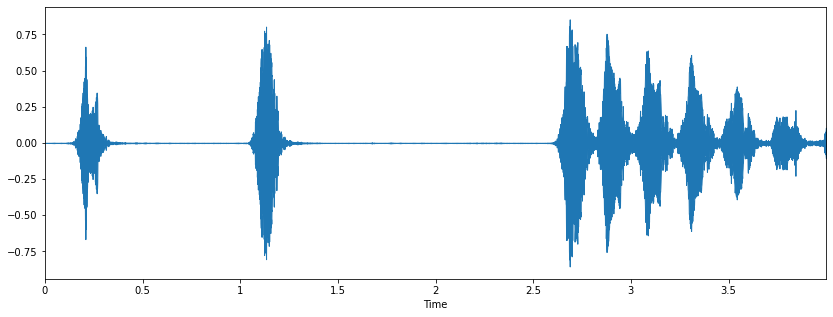

In [ ]:
### Dog Sound
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

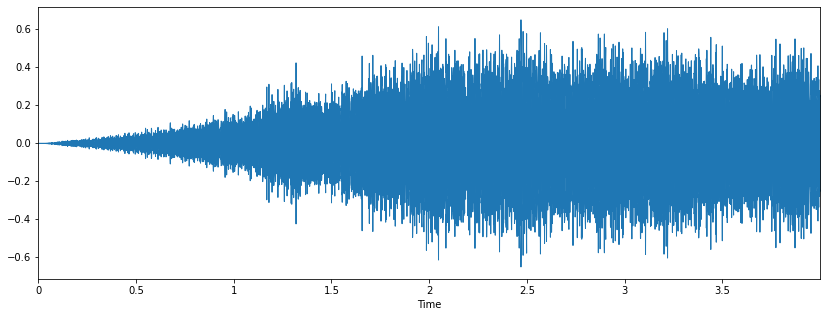

In [ ]:
### Sound
filename='/content/drive/MyDrive/Colab Notebooks/Audio classification/UrbanSound8K/UrbanSound8K/audio/fold3/103199-4-0-0.wav'
plt.figure(figsize=(14,5))
data,sample_rate=librosa.load(filename)
librosa.display.waveplot(data,sr=sample_rate)
ipd.Audio(filename)

In [ ]:
sample_rate

22050

In [ ]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio=wav.read(filename)

In [ ]:
wave_sample_rate

44100

In [ ]:
wave_audio #at scipy

array([[    0,     0],
       [    0,     0],
       [    0,     0],
       ...,
       [-6804, -3721],
       [-5762, -2537],
       [-3960,  -784]], dtype=int16)

In [ ]:
data  # at librosa

array([ 0.        ,  0.        ,  0.        , ..., -0.137661  ,
       -0.15557232, -0.12712388], dtype=float32)

In [ ]:
import pandas as pd

metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Audio classification/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [ ]:
### Check whether the dataset is imbalanced
metadata['class'].value_counts()

dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

##Audio Classification Data Preprocessing

In [ ]:
### Let's read a sample audio using librosa
import librosa
audio_file_path='/content/drive/MyDrive/Colab Notebooks/Audio classification/UrbanSound8K/UrbanSound8K/audio/fold5/100852-0-0-0.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [ ]:
print(librosa_audio_data)

[0.         0.         0.         ... 0.07328529 0.01718586 0.02088184]


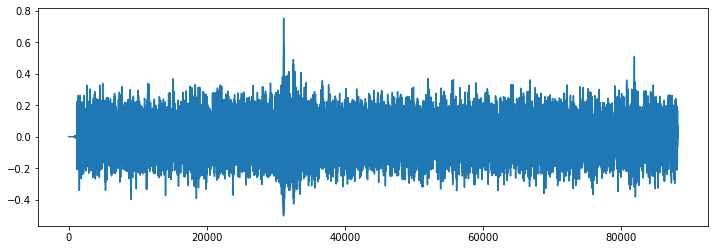

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio with 1 channel 
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

###Observation
Here Librosa converts the signal to mono, meaning the channel will alays be 1

In [ ]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [ ]:
wave_audio

array([[   0,    0],
       [   0,    0],
       [   0,    0],
       ...,
       [1394, -815],
       [ 541,  377],
       [1838,  834]], dtype=int16)

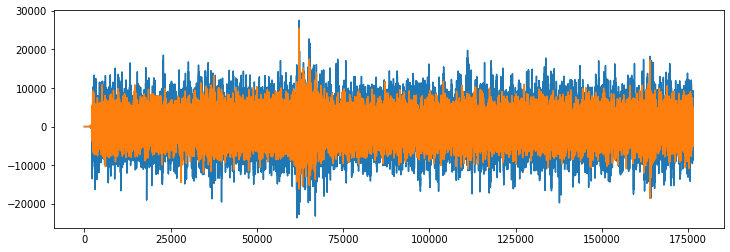

In [ ]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

##Extract Features
Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [ ]:
mfccs

array([[-6.88746338e+02, -2.58018555e+02, -1.00240845e+02, ...,
        -4.61182938e+01, -3.79792099e+01, -4.79668694e+01],
       [ 5.42953920e+00,  8.19190903e+01,  7.96930237e+01, ...,
         7.32485046e+01,  6.80479126e+01,  7.28407898e+01],
       [ 1.26239002e+00, -2.92441254e+01, -3.99228134e+01, ...,
        -4.62667160e+01, -3.82396088e+01, -3.97570992e+01],
       ...,
       [ 5.00286937e-01,  6.62484741e+00,  4.10739994e+00, ...,
         7.71777868e+00,  8.40742970e+00,  5.08684158e+00],
       [ 3.58334750e-01, -1.34668499e-01, -4.87440300e+00, ...,
         1.31462097e+00, -9.69202638e-01, -4.05482960e+00],
       [-3.40627241e+00,  4.96777439e+00,  5.91685247e+00, ...,
         1.11585922e+01,  7.85942221e+00,  1.53429031e+00]], dtype=float32)

In [ ]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='/content/drive/MyDrive/Colab Notebooks/Audio classification/UrbanSound8K/UrbanSound8K/audio/'
metadata=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Audio classification/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [ ]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [ ]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3555it [21:38,  2.45it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1323
  n_fft, y.shape[-1]
8326it [49:01,  3.60it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1103
  n_fft, y.shape[-1]
8329it [49:02,  3.52it/s]/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=1523
  n_fft, y.shape[-1]
8732it [51:16,  2.84it/s]


In [ ]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-214.95764, 70.502464, -130.70279, -53.116936...",dog_bark
1,"[-423.7311, 109.2299, -52.872597, 60.827538, 0...",children_playing
2,"[-458.52844, 121.35432, -46.535675, 51.969467,...",children_playing
3,"[-413.63254, 101.61351, -35.43868, 53.047146, ...",children_playing
4,"[-446.38693, 113.68634, -52.4572, 60.349724, 2...",children_playing


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [ ]:
X.shape

(8732, 40)

In [ ]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [ ]:
y.shape

(8732,)

In [ ]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-1.3082390e+02,  1.1256225e+02, -2.2600878e+01, ...,
         3.2528090e+00, -1.3692100e+00,  2.7386472e+00],
       [-1.3446434e+01,  9.1048195e+01, -7.8661475e+00, ...,
        -3.2665925e+00, -5.2884049e+00, -1.5532947e+00],
       [-4.9575279e+01,  2.3543632e-01, -2.0504959e+01, ...,
         2.8775635e+00, -1.5828822e+00,  3.5109408e+00],
       ...,
       [-4.2677444e+02,  9.2583252e+01,  3.3174915e+00, ...,
         7.9330575e-01,  7.1890563e-01,  7.1397936e-01],
       [-1.4541722e+02,  1.3619025e+02, -3.3450352e+01, ...,
         1.4591718e+00, -1.9928970e+00, -8.9318532e-01],
       [-4.2099823e+02,  2.1074756e+02,  3.5814040e+00, ...,
        -5.4054899e+00, -3.3959770e+00, -1.5590971e+00]], dtype=float32)

In [ ]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
X_train.shape

(6985, 40)

In [ ]:
X_train=X_train.reshape(6985, 1, 40)
X_train.shape

(6985, 1, 40)

In [ ]:
X_test.shape

(1747, 40)

In [ ]:
X_test=X_test.reshape(1747,1, 40)
X_test.shape

(1747, 1, 40)

In [ ]:
y_train.shape

(6985, 10)

In [ ]:
y_test.shape

(1747, 10)

##Model Creation

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.2


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,LSTM,Embedding
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
### No of classes
num_labels=y.shape[1]

In [ ]:
model=Sequential()
#model.add(Embedding(input_dim=40, output_dim=40))
model.add(LSTM(128,return_sequences=True, input_shape=(1,40)))
model.add(LSTM(128))
###first layer
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#adding LSTM 

###second layer
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))
model.build()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 128)            86528     
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 128)               16512     
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 activation_1 (Activation)   (None, 256)               0

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - ETA: 0s - loss: 1.7999 - accuracy: 0.3337
Epoch 1: val_loss improved from inf to 1.33047, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 7s 13ms/step - loss: 1.7999 - accuracy: 0.3337 - val_loss: 1.3305 - val_accuracy: 0.5724
Epoch 2/100
215/219 [============================>.] - ETA: 0s - loss: 1.2792 - accuracy: 0.5629
Epoch 2: val_loss improved from 1.33047 to 1.08480, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 8ms/step - loss: 1.2756 - accuracy: 0.5642 - val_loss: 1.0848 - val_accuracy: 0.6428
Epoch 3/100
213/219 [============================>.] - ETA: 0s - loss: 1.0460 - accuracy: 0.6511
Epoch 3: val_loss improved from 1.08480 to 0.98483, saving model to saved_models/audio_classification.hdf5
219/219 [==============================] - 2s 9ms/step - loss: 1.0475 - accuracy: 0.6507 - val_loss: 0.9848 - val_accuracy: 0.669

In [ ]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8689181208610535


In [ ]:
X_test[1]


array([[-465.89066  ,    1.1322277,  -34.01122  ,   35.365326 ,
         -14.865486 ,  -19.09527  ,   -0.5655366,  -16.102211 ,
         -21.32794  ,    7.7042246,  -29.161444 ,  -18.939268 ,
          -2.9505708,   -8.135997 ,  -15.148013 ,   -6.580668 ,
          -7.555405 ,    9.359482 ,   14.432987 ,   21.94775  ,
          20.870613 ,    1.3638182,  -19.213827 ,   -4.613979 ,
          -1.0521431,    3.2284064,   -6.983857 ,  -16.403254 ,
         -10.018602 ,   13.024475 ,    0.5268236,  -23.8531   ,
         -15.273722 ,    9.262865 ,   10.387703 ,   -0.562457 ,
          -1.2470247,   17.716091 ,   13.853949 ,   -5.1873612]],
      dtype=float32)

In [ ]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test)
classes_x=np.argmax(predict_x,axis=1)
classes_x

array([5, 6, 4, ..., 1, 2, 3])

In [ ]:
filename="/content/drive/MyDrive/Colab Notebooks/Audio classification/101415-3-0-2.wav"
prediction_feature=features_extractor(filename)
print(prediction_feature.shape)
prediction_feature=prediction_feature.reshape(1,1,-1)
print(prediction_feature.shape)
#model.predict_classes(prediction_feature)
predict_f=model.predict(prediction_feature)  #used in place of predict classes 
classes_f=np.argmax(predict_f,axis=1)  # predict_class will return the index of the class having maximum value. For example, if cat is 0.6 and dog is 0.4, it will return 0 if the class cat is at index 0)
print(classes_f)

prediction_class1 = labelencoder.inverse_transform(classes_f) 
prediction_class1

(40,)
(1, 1, 40)
[1]


array(['car_horn'], dtype='<U16')

##Testing Some Test Audio Data

Steps

Preprocess the new audio data

predict the classes

Invere transform your Predicted Label

In [ ]:
filename="/content/drive/MyDrive/Colab Notebooks/Audio classification/children-playground-in-a-park.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

print(mfccs_scaled_features)
#mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,1,-1) # as used lstm have to reshape in 3 dim
print(mfccs_scaled_features.shape)
#predicted_label=model.predict_classes(mfccs_scaled_features)
predict_f=model.predict(mfccs_scaled_features)  #used in place of predict classes
predicted_label=np.argmax(predict_f,axis=1)  # predict_class will return the index of the class having maximum value. For example, if cat is 0.6 and dog is 0.4, it will return 0 if the class cat is at index 0)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class


[-3.0630276e+02  8.2875572e+01 -5.3645302e+01 -5.1358652e+00
 -3.4560852e+01  2.4558115e+00 -1.6771673e+01 -4.0908217e+00
 -1.7133375e+01 -7.2672038e+00 -1.6307014e+01 -1.8464072e-01
 -1.2921110e+01 -7.5208448e-02 -1.0726671e+01 -1.9744067e+00
 -8.8400307e+00 -5.1084609e+00 -8.6078825e+00 -3.2251759e+00
 -4.7187176e+00 -2.4210889e+00 -4.1836982e+00 -4.0749087e+00
 -2.5811803e+00 -1.1037021e+00 -3.0314627e+00 -1.5252512e+00
 -1.1774917e+00 -1.4211895e+00  9.3535900e-02 -6.4277005e-01
 -7.4898386e-01 -1.6107600e+00  4.8505294e-01 -2.0139146e+00
  6.0988373e-01 -6.5188539e-01  9.5290370e-02 -1.7392735e+00]
(1, 1, 40)
[2]


array(['children_playing'], dtype='<U16')